# Graph partitioning

The goal is to partition the nodes of a graph to sets of equal size with minimum number of edges between the sets.

In [13]:
from dimod import DiscreteQuadraticModel, ExactDQMSolver
from itertools import combinations
import networkx as nx

# Graph partitioning with more than 2 sets

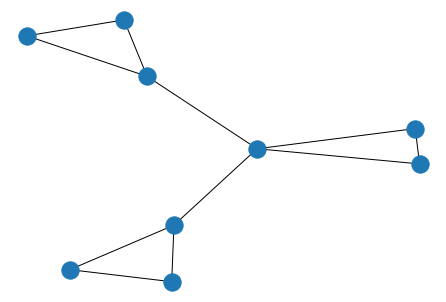

In [2]:
edges = [
    (1, 2), (2, 3), (1, 3), 
    (4, 5), (5, 6), (4, 6), 
    (7, 8), (8, 9), (7, 9),
    (2, 4), (4, 8)
]
nodes = sorted(set().union(*edges))
nx.draw(nx.Graph(edges))

# Decision variable
- This time we assign a binary variable $x_{i,k}$ for each node i and set k. If the value is one, the node i belongs to set k.

In [5]:
dqm = DiscreteQuadraticModel()

m = 3
n = len(nodes)
x = {node: dqm.add_variable(m) for node in nodes}

# Objective
- Rather than penalizing two nodes that are not in the same set, we reward if
    - if two nodes belong to the same set
- the two nodes are connected

In [9]:
for a, b in edges:
    for k in range(m):
        dqm.set_quadratic_case(x[a], k, x[b], k, -1)   

# Constraints

The size of each set is the n/m
- n is the number of nodes
- m is the number of sets

In [10]:
for k in range(m):
    dqm.add_linear_equality_constraint(
        [(x[i], k, 1.0) for i in nodes],
        constant=-n/m,
        lagrange_multiplier=10
    )    

Each node can only belong to one set. This is naturally handled by the DQM object and all DQM solvers.

In [17]:
res = ExactDQMSolver().sample_dqm(dqm).truncate(10)
print(res)

  0 1 2 3 4 5 6 7 8 energy num_oc.
0 2 2 2 0 0 0 1 1 1   -9.0       1
1 2 2 2 1 1 1 0 0 0   -9.0       1
2 1 1 1 0 0 0 2 2 2   -9.0       1
3 0 0 0 1 1 1 2 2 2   -9.0       1
4 0 0 0 2 2 2 1 1 1   -9.0       1
5 1 1 1 2 2 2 0 0 0   -9.0       1
6 2 2 2 0 1 1 1 0 0   -6.0       1
7 0 0 0 1 2 2 2 1 1   -6.0       1
8 0 0 0 1 1 2 2 1 2   -6.0       1
9 0 1 1 1 0 0 2 2 2   -6.0       1
['DISCRETE', 10 rows, 10 samples, 9 variables]


In [19]:
res.first.sample

{0: 2, 1: 2, 2: 2, 3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1}